In [46]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

In [52]:
def percentual_Transform(s):
    
    l = s.split("\/")
    l = list(map(lambda n: int(n),l))
    p = l[0]/l[1] * 100
    
    return p

def check_stab(df):
    new_col = []
    for i in range(len(df)):
        if df['Pokemon Type'][i].split('\'')[1] == df['Type Move'][i] or (len(df['Pokemon Type'][i].split('\'')) > 3 and df['Pokemon Type'][i].split('\'')[3] == df['Type Move'][i]):
            new_col.append(True)
        else:
            new_col.append(False)
    df = df.assign(stab=new_col)
    df = df.drop(['Pokemon Type', 'Type Move'], axis= 1)
    return df

In [53]:
df = pd.read_csv("../parsing Dataset/log/Dataset.csv")

df["UserHP"] = df["UserHP"].map(percentual_Transform)
df["SuffererHP"] = df["SuffererHP"].map(percentual_Transform)

df.rename({"UserHP": "Pokemon HP","SuffererHP": "Enemy HP","TypeM": "Type Move",
           "categoryMove": "Category Move","TypesS" : "Enemy Type","TypesU":"Pokemon Type",
           "power":"Power"}, axis=1, inplace=True)
df["Choose"] = np.ones(len(df)).astype(int)
df = check_stab(df)
df

,User,Sufferer,name move,Enemy Type,Power,Pokemon HP,Enemy HP,Weather,Category Move,Choose,stab
0,Flygon,Aerodactyl\n,U-turn,"['rock', 'flying']",70,100.000000,100.000000,none,physical,1,False
1,Aerodactyl,Bronzong\n,Stealth Rock,"['steel', 'psychic']",0,100.000000,100.000000,none,status,1,True
2,Bronzong,Bronzong\n,Trick Room,"['steel', 'psychic']",0,100.000000,100.000000,none,status,1,True
3,Bronzong,Forretress\n,Earthquake,"['bug', 'steel']",100,100.000000,100.000000,none,physical,1,False
4,Forretress,Bronzong\n,Spikes,"['steel', 'psychic']",0,100.000000,100.000000,none,status,1,False
...,...,...,...,...,...,...,...,...,...,...,...
602,Entei,Fezandipiti\n,Sacred Fire,"['poison', 'fairy']",100,72.638436,38.545455,none,physical,1,True
603,Persian,Persian\n,Nasty Plot,['normal'],0,100.000000,100.000000,none,status,1,False
604,Entei,Persian\n,Sacred Fire,['normal'],100,72.638436,100.000000,none,physical,1,True
605,Persian,Entei\n,Dark Pulse,['fire'],80,100.000000,72.638436,none,special,1,False


In [39]:
from sklearn.preprocessing import KBinsDiscretizer

enc = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
enc.fit(df[["Pokemon HP"]])
df["Pokemon HP"] = enc.transform(df[["Pokemon HP"]]).astype(int)
enc.fit(df[["Enemy HP"]])
df["Enemy HP"] = enc.transform(df[["Enemy HP"]]).astype(int)
enc = KBinsDiscretizer(n_bins=3, encode='ordinal',strategy='uniform')
enc.fit(df[["Power"]])
df["Power"] = enc.transform(df[["Power"]]).astype(int)
df

/Users/christiandibuo/VisualStudio Projects/showdownBayesian/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/christiandibuo/VisualStudio Projects/showdownBayesian/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/christiandibuo/VisualStudio Projects/showdownBayesian/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in 

,User,Sufferer,name move,Pokemon Type,Enemy Type,Type Move,Power,Pokemon HP,Enemy HP,Weather,Category Move,Choose,stab
0,Flygon,Aerodactyl\n,U-turn,"['ground', 'dragon']","['rock', 'flying']",bug,0,2,2,none,physical,1,False
1,Aerodactyl,Bronzong\n,Stealth Rock,"['rock', 'flying']","['steel', 'psychic']",rock,0,2,2,none,status,1,True
2,Bronzong,Bronzong\n,Trick Room,"['steel', 'psychic']","['steel', 'psychic']",psychic,0,2,2,none,status,1,True
3,Bronzong,Forretress\n,Earthquake,"['steel', 'psychic']","['bug', 'steel']",ground,1,2,2,none,physical,1,False
4,Forretress,Bronzong\n,Spikes,"['bug', 'steel']","['steel', 'psychic']",ground,0,2,2,none,status,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,Entei,Fezandipiti\n,Sacred Fire,['fire'],"['poison', 'fairy']",fire,1,2,1,none,physical,1,True
603,Persian,Persian\n,Nasty Plot,['normal'],['normal'],dark,0,2,2,none,status,1,False
604,Entei,Persian\n,Sacred Fire,['fire'],['normal'],fire,1,2,2,none,physical,1,True
605,Persian,Entei\n,Dark Pulse,['normal'],['fire'],dark,0,2,2,none,special,1,False


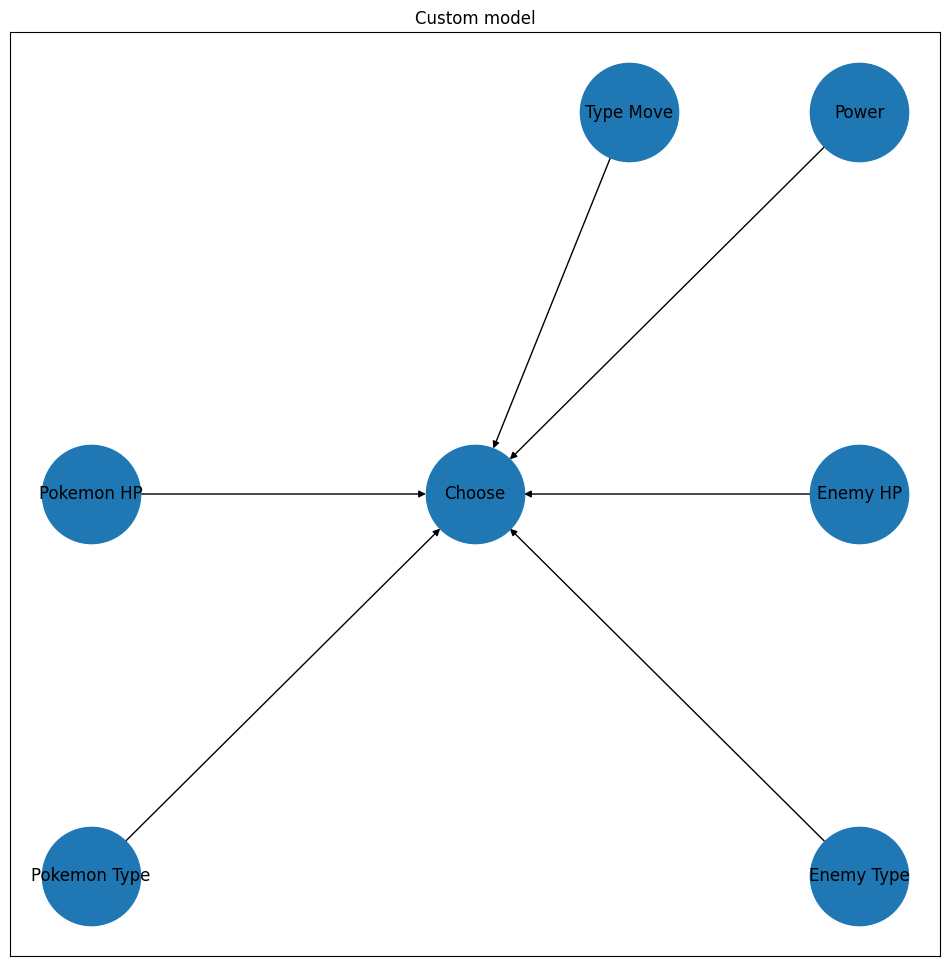

In [40]:
custom_model = BayesianNetwork([('Pokemon HP', 'Choose'), ('Enemy HP', 'Choose'),
                              ('Pokemon Type', 'Choose'), ('Enemy Type', 'Choose'), ('Power', 'Choose'),
                               ("Type Move","Choose")])
pos = {'Pokemon HP': [0.75, -0.5], 'Enemy HP': [1.25, -0.5],
       'Pokemon Type': [0.75, -1.], 'Enemy Type': [1.25, -1],
       'Power': [1.25, 0], "Type Move" : [1.1, 0],
       'Choose': [1, -0.5]}
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
nx.draw_networkx(custom_model, pos=pos, ax=ax, node_size=5000)
ax.set_title('Custom model')
fig.savefig('custom_bn')

In [41]:

estimator = BayesianEstimator(model=custom_model, data=df)

cpds = []
for node in custom_model.nodes():
    if node == "Choose":
        continue
    cpds.append(estimator.estimate_cpd(node=node, 
                                       prior_type="BDeu", 
                                       equivalent_sample_size=10))
custom_model.add_cpds(*cpds)

print('Checking the model...')
print(f'The model is {custom_model.check_model()}\n\n')

for cpd in [cpd for cpd in custom_model.get_cpds()]:
    print(f'CPD for {cpd.variable}:')
    print(cpd, '\n')

Checking the model...


ValueError: No CPD associated with Choose